In [191]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [192]:
#import dataset
df = pd.read_csv("data.csv")
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


id: Unique ID for the customer

Gender: Gender of the customer

Age: Age of the customer

Driving_License: [0 : Customer does not have DL, 1 : Customer already has DL]

Region_Code: Unique code for the region of the customer

Previously_Insured: [1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance]

Vehicle_Age: Age of the Vehicle

Vehicle_Damage: [1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.]

Annual_Premium: The amount customer needs to pay as premium in the year

Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage: Number of Days, Customer has been associated with the company

Response: [1 : Customer is interested, 0 : Customer is not interested]

In [193]:
#EDA
df.shape

(381109, 12)

In [194]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [196]:
value_counts = df['Response'].value_counts()

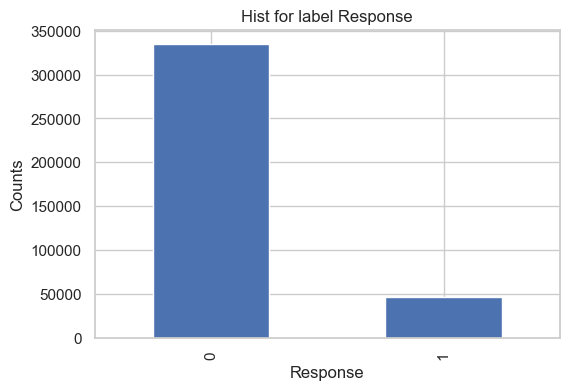

In [197]:
# hists & graphs

plt.figure(figsize=(6,4))

value_counts.plot(kind='bar')

plt.xlabel('Response')
plt.ylabel('Counts')
plt.title("Hist for label Response")
plt.show()

<Axes: >

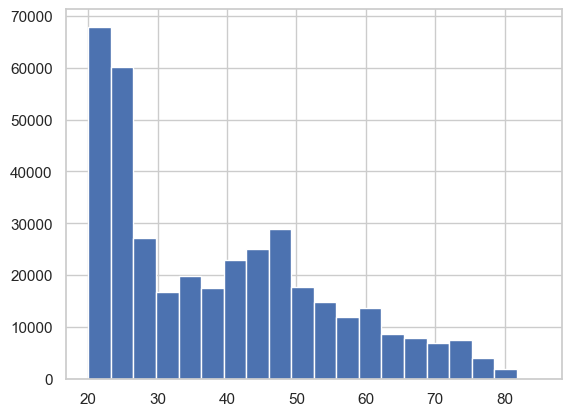

In [198]:
df['Age'].hist(bins=20)

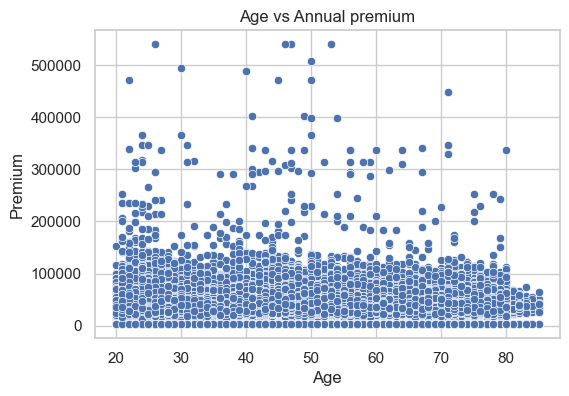

In [199]:
#scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Annual_Premium', data=df)
plt.title("Age vs Annual premium")
plt.xlabel("Age")
plt.ylabel("Premium")
plt.show()

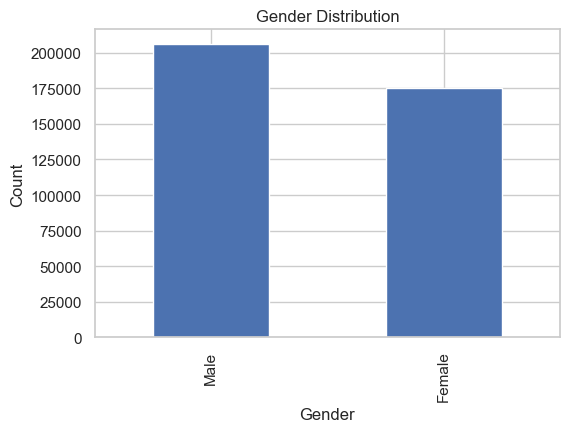

In [200]:
#Gender response

plt.figure(figsize=(6,4))
value_counts = df['Gender'].value_counts()

value_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Gender Distribution")
plt.show()

In [201]:
df['Region_Code'].unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

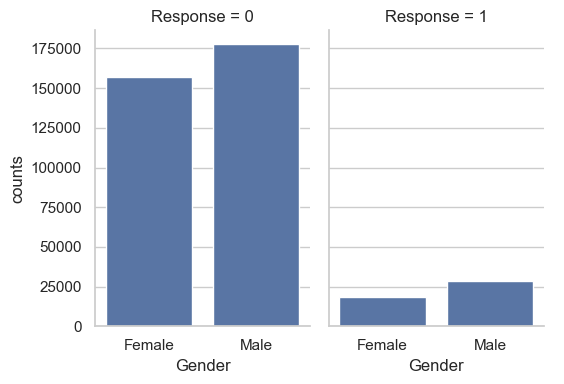

In [202]:
data = df.groupby(['Gender',"Response"])['id'].count().to_frame().rename(columns={'id':'counts'}).reset_index()
sns.catplot(x="Gender", y='counts',col="Response",data=data, kind='bar', height=4, aspect=.7)

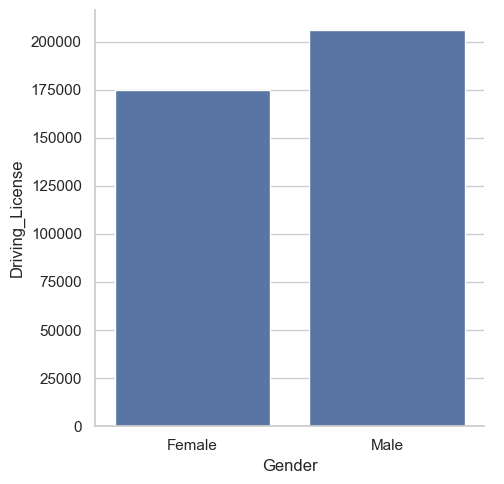

In [203]:
#driving license by gender
data = df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x='Gender', y='Driving_License', data=data, kind='bar')


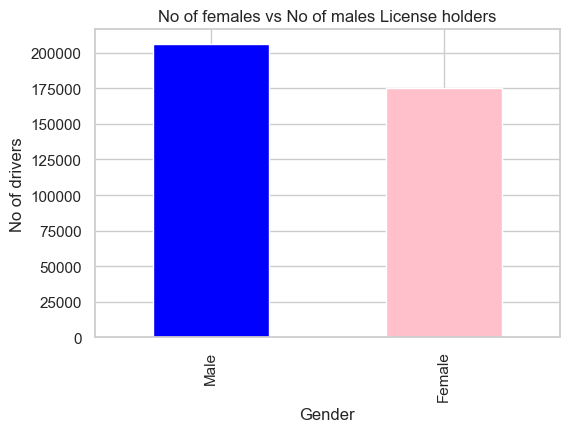

In [204]:
# filter only license holders
license_holders = df[df['Driving_License']==1]

gender_count = df['Gender'].value_counts()

plt.figure(figsize=(6,4))
gender_count.plot(kind='bar', color=['blue','pink'])
plt.title('No of females vs No of males License holders')
plt.xlabel("Gender")
plt.ylabel("No of drivers")
plt.show()

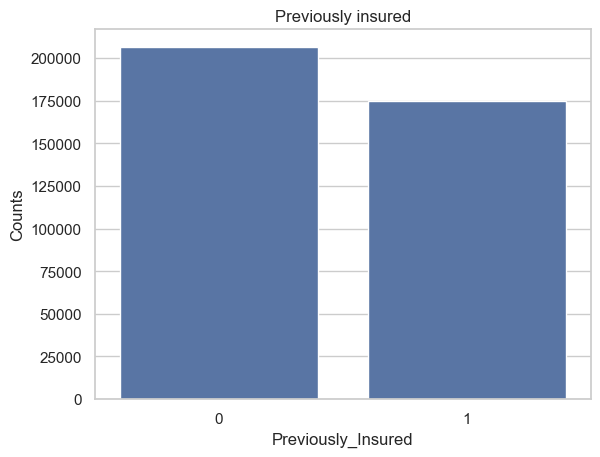

In [205]:
# cust with exiisting insurance
sns.countplot(x='Previously_Insured', data=df)
plt.title("Previously insured")
plt.xlabel("Previously_Insured")
plt.ylabel("Counts")
plt.show()

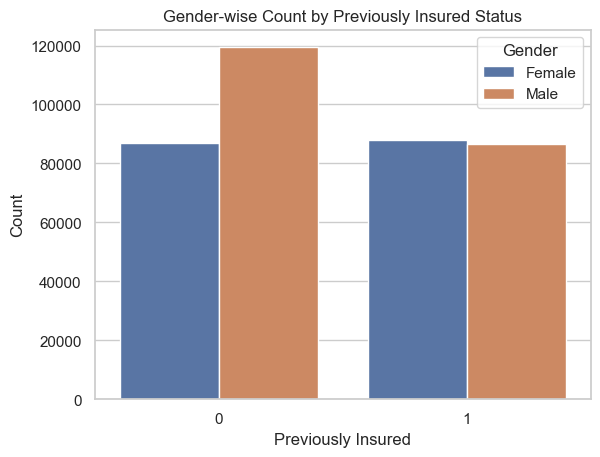

In [206]:
data = df.groupby(['Previously_Insured', 'Gender']).size().reset_index(name='Count')

sns.barplot(x='Previously_Insured', y='Count', hue='Gender', data=data)
plt.xlabel("Previously Insured")
plt.ylabel("Count")
plt.title("Gender-wise Count by Previously Insured Status")
plt.show()


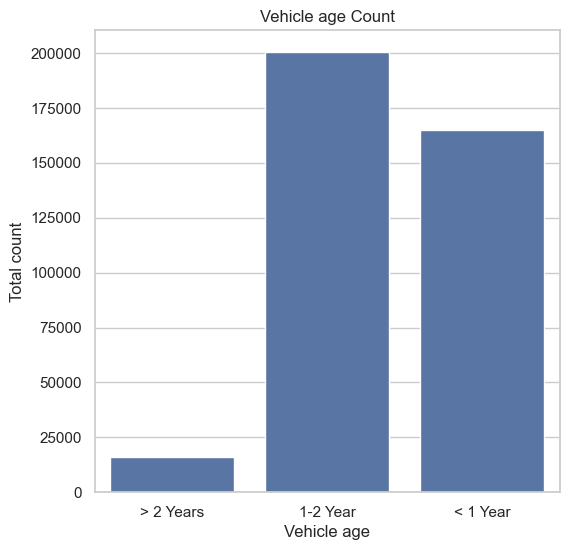

In [207]:
#checking vehicle age
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='Vehicle_Age')
plt.xlabel("Vehicle age")
plt.ylabel("Total count")
plt.title("Vehicle age Count")
plt.show()

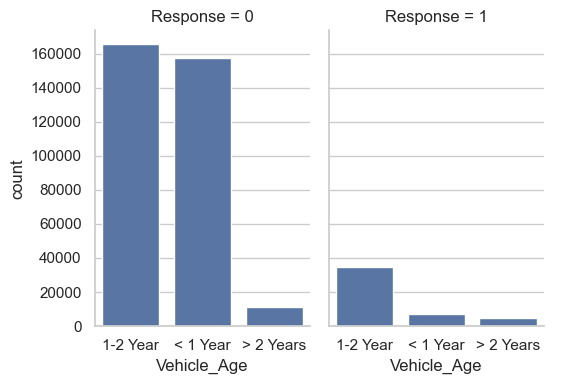

In [208]:
#response vs vehicle age
data = df.groupby(["Response","Vehicle_Age"])['id'].count().to_frame().rename(columns={"id":'count'}).reset_index()
sns.catplot(data=data, x='Vehicle_Age', y="count", col="Response", kind='bar',aspect=0.7, height=4)

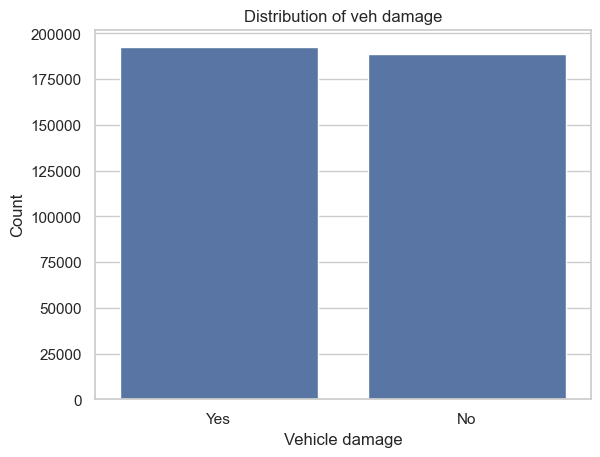

In [209]:
#dist for vehicle damage
sns.countplot(data=df, x='Vehicle_Damage')
plt.title("Distribution of veh damage")
plt.xlabel("Vehicle damage")
plt.ylabel("Count")
plt.show()

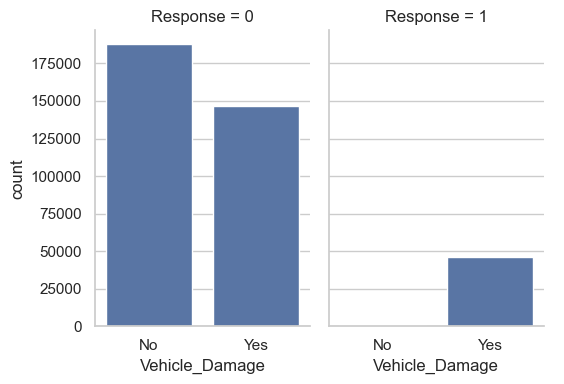

In [210]:
#vehhicle damage distribution wrt response
data = df.groupby(["Vehicle_Damage","Response"])['id'].count().to_frame().rename(columns={"id":"count"}).reset_index()
sns.catplot(data=data, x="Vehicle_Damage", y="count", col="Response",kind='bar', height=4, aspect=0.7)

<Axes: >

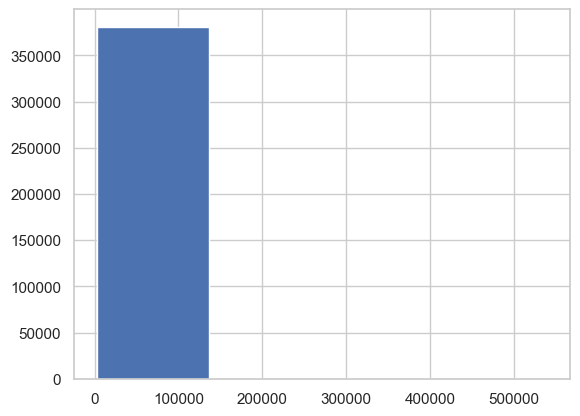

In [211]:
df['Annual_Premium'].hist(bins=4)

In [212]:
df[df['Annual_Premium']>200000].count()

id                      112
Gender                  112
Age                     112
Driving_License         112
Region_Code             112
Previously_Insured      112
Vehicle_Age             112
Vehicle_Damage          112
Annual_Premium          112
Policy_Sales_Channel    112
Vintage                 112
Response                112
dtype: int64

# Data preprocessing


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [214]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Region_Code','Previously_Insured','Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Policy_Sales_Channel']

In [215]:
df["Gender"] = df['Gender'].map({'Female':0,'Male':1 })
#df['Gender']

In [216]:
df=pd.get_dummies(df,drop_first=True)
#df.head()

In [217]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,False,True,True
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,True,False,False
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,True,False,False


In [218]:
df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype('int')

for column in cat_feat:
    df[column] = df[column].astype('str')

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      381109 non-null  int64  
 1   Gender                  381109 non-null  object 
 2   Age                     381109 non-null  int64  
 3   Driving_License         381109 non-null  object 
 4   Region_Code             381109 non-null  object 
 5   Previously_Insured      381109 non-null  object 
 6   Annual_Premium          381109 non-null  float64
 7   Policy_Sales_Channel    381109 non-null  object 
 8   Vintage                 381109 non-null  int64  
 9   Response                381109 non-null  int64  
 10  Vehicle_Age_lt_1_Year   381109 non-null  object 
 11  Vehicle_Age_gt_2_Years  381109 non-null  object 
 12  Vehicle_Damage_Yes      381109 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 37.8+ MB


In [220]:
#Standard scaling

from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()
df[num_feat] = ss.fit_transform(df[num_feat])

mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[["Annual_Premium"]])

id=df.id
df=df.drop('id', axis=1)


In [221]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,1
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,0
2,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,0,1,1
3,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,0,0
4,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,1,0,0


In [222]:
from sklearn.model_selection import train_test_split
train = df.drop(columns=["Response"])
target = df['Response']
xtrain, xtest, ytrain, ytest = train_test_split(train, target, test_size=0.3, random_state=0)

In [224]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,0,1,1
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0
2,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,0,1,1
3,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,1,0,0
4,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,2.267815,1,26.0,1,0.051234,26.0,-0.792954,0,0,0
381105,1,-0.568774,1,37.0,1,0.069551,152.0,-0.279037,1,0,0
381106,1,-1.148985,1,30.0,1,0.060439,160.0,0.079509,1,0,0
381107,0,1.881007,1,14.0,0,0.078110,124.0,-0.960275,0,1,1


# Model training RFC

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search = {
    'criterion':['entropy','gini'],
    'max_depth': [2,3,5,7,10],
    'min_samples_leaf':[4,6,8,10],
    'min_samples_split':[5,7,10],
    'n_estimators':[300]
}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator= clf, param_distributions=random_search, n_iter=10, cv=4, verbose=1, random_state=101, n_jobs=-1)
model.fit(xtrain, ytrain)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 5, 7, 10],
                                        'min_samples_leaf': [4, 6, 8, 10],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [ ]:
best_params = model.best_params_

params = {'n_estimators': [300], 'min_samples_split': [5], 'min_samples_leaf': [8], 'max_depth': [10], 'criterion': ['entropy']}

print(best_params)

In [234]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator= clf, param_distributions=params, n_iter=10, cv=4, verbose=1, random_state=101, n_jobs=-1)
model.fit(xtrain, ytrain)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy'],
                                        'max_depth': [10],
                                        'min_samples_leaf': [8],
                                        'min_samples_split': [5],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [235]:
import pickle

filename = 'rf_model.pkl'
pickle.dump(model, open(filename, 'wb'))


In [236]:
rf_load = pickle.load(open(filename, 'rb'))

# Model eval

In [239]:
from sklearn.metrics import classification_report, accuracy_score
ypred = model.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100241
           1       0.50      0.00      0.00     14092

    accuracy                           0.88    114333
   macro avg       0.69      0.50      0.47    114333
weighted avg       0.83      0.88      0.82    114333



In [240]:
print(accuracy_score(ytest, ypred))

0.8767459963440126
